In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df_DA = df.copy()
df_DA = df_DA[df_DA['job_title_short'] == 'Data Analyst']
df_DA_expl = df_DA.explode('job_skills')
skill_stats = df_DA_expl.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)
skill_stats = skill_stats.sort_values(by = 'skill_count', ascending = False).head(10)

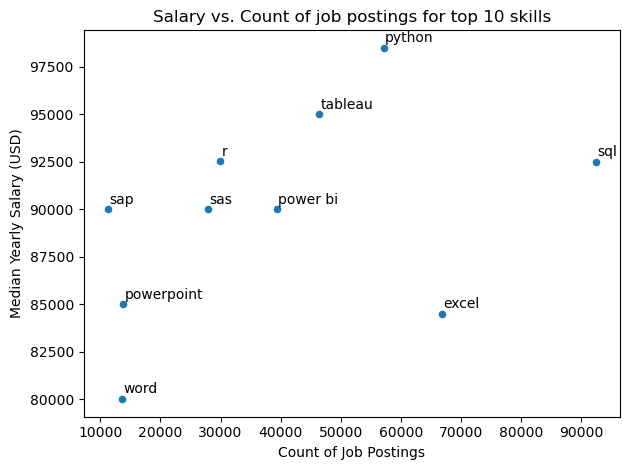

In [20]:
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of job postings for top 10 skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i]+200, skill_stats['median_salary'].iloc[i]+300, txt)

plt.tight_layout()
plt.show()

In [27]:
median_year_salary = df.groupby('job_title_short').agg(
    job_count = ('job_title_short', 'count'),
    median_calc = ('salary_year_avg', 'median')
).dropna()

median_year_salary

,job_count,median_calc
job_title_short,,
Business Analyst,49063,85000.0
Cloud Engineer,12331,90000.0
Data Analyst,196075,90000.0
Data Engineer,186241,125000.0
Data Scientist,172286,127500.0
Machine Learning Engineer,14080,106415.0
Senior Data Analyst,29216,111175.0
Senior Data Engineer,44563,147500.0
Senior Data Scientist,36957,155500.0


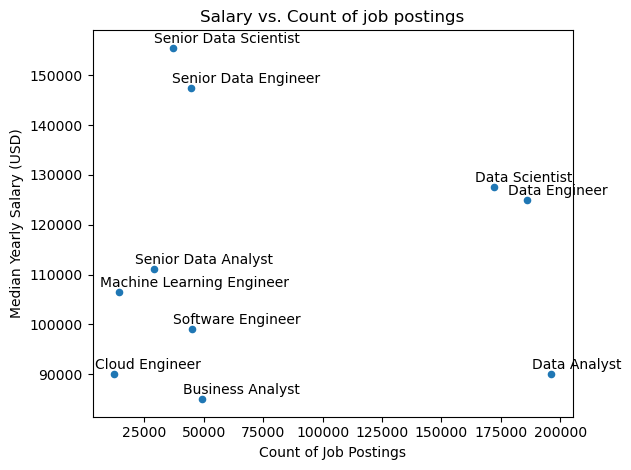

In [36]:
median_year_salary.plot(kind = 'scatter', x = 'job_count', y = 'median_calc')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of job postings')


for i, txt in enumerate(median_year_salary.index):
    plt.text(median_year_salary['job_count'].iloc[i]-8000, median_year_salary['median_calc'].iloc[i]+1000, txt)

plt.tight_layout()
plt.show()

In [44]:
job_place = df.groupby('job_location').agg(
    job_count = ('job_title_short', 'count'),
    median_calc = ('salary_year_avg', 'median')
).dropna().sort_values(by='job_count', ascending=False).head(7)

job_place

,job_count,median_calc
job_location,,
Anywhere,69552,128829.625
Singapore,23415,100500.000
"Paris, France",12311,97863.500
"Bengaluru, Karnataka, India",11474,111175.000
"London, UK",10564,107969.750
"Madrid, Spain",9787,89100.000
"New York, NY",8165,126000.000


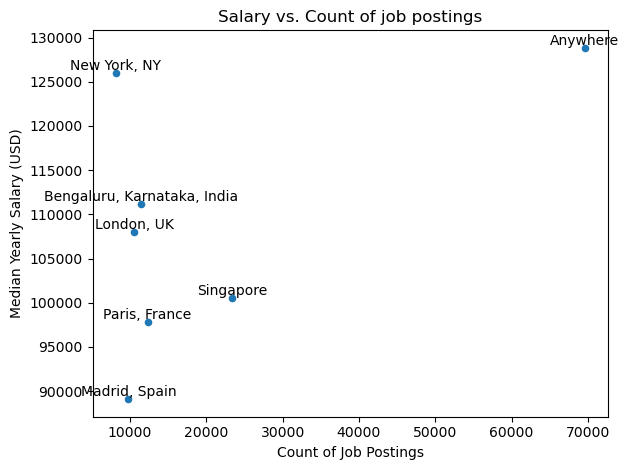

In [50]:
job_place.plot(kind = 'scatter', x = 'job_count', y = 'median_calc')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of job postings')


for i in range(len(job_place)):
   job_count = job_place['job_count'].iloc[i]
   mean_salary = job_place['median_calc'].iloc[i]
   country = job_place.index[i]
   plt.text(job_count, mean_salary, country, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [2]:
df_job_title = df.copy()


In [3]:
df_job_title = df_job_title[(df_job_title['job_title_short'] == 'Data Analyst') | (df_job_title['job_title_short'] == 'Data Scientist') | (df_job_title['job_title_short'] == 'Data Engineer')]


In [4]:
df_location = df_job_title[df_job_title['job_location'] == 'United States']



In [5]:
df_final = df_location[(df_location['job_schedule_type'] == 'Full-time') | (df_location['job_schedule_type'] == 'Contractor')]


In [6]:
df_final['job_title_type'] = df_final['job_title_short'] + ' (' + df_final['job_schedule_type'] + ')'

/var/folders/rx/g_7y2v794k5cn91ncfww9jf00000gn/T/ipykernel_30658/2820175926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['job_title_type'] = df_final['job_title_short'] + ' (' + df_final['job_schedule_type'] + ')'


In [15]:
df_final = df_final.dropna(subset=['salary_year_avg'])


In [8]:
job_filter = df_final.groupby('job_title_type').agg(
    job_count = ('job_title_short', 'count'),
    avg_calc = ('salary_year_avg', 'mean')
).sort_values(by='job_count', ascending=False)



In [9]:
job_filter

,job_count,avg_calc
job_title_type,,
Data Scientist (Full-time),198,143406.939394
Data Engineer (Full-time),108,137088.658709
Data Analyst (Full-time),34,98427.750000
Data Analyst (Contractor),1,105000.000000


In [12]:
# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
   (df['job_country'] == 'United States') &
   (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
   (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
   mean_salary_year_avg=('salary_year_avg', 'mean'),
   job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']



In [13]:
stats

,job_schedule_type,job_title_short,mean_salary_year_avg,job_count,job_title_type
0,Contractor,Data Analyst,87027.197142,111,Data Analyst - Contractor
1,Contractor,Data Engineer,117772.326225,74,Data Engineer - Contractor
2,Contractor,Data Scientist,118568.074155,61,Data Scientist - Contractor
3,Full-time,Data Analyst,95072.545202,4097,Data Analyst - Full-time
4,Full-time,Data Engineer,133804.432239,2759,Data Engineer - Full-time
5,Full-time,Data Scientist,140848.379828,4325,Data Scientist - Full-time


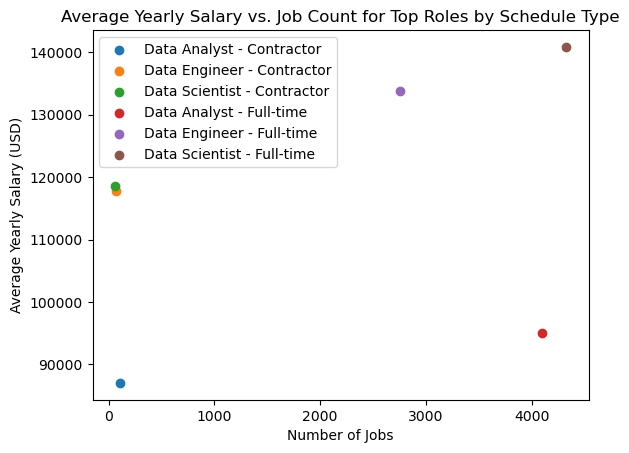

In [14]:
# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
   subset = stats[stats['job_title_type'] == job_title_type]
   plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()